<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/Mall_Customer(GMM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/Mall_Customers.csv')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# prompt: replace gender column with male as 0 and female as 1

data['Gender'] = data['Gender'].replace(['Male', 'Female'], [0, 1])


In [17]:
data.shape

(200, 5)

In [18]:
data = data.drop(['CustomerID'],axis=1)

In [19]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [20]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


Here we reduce the dimension.. so we use standardscaler method. in standardscaler is used to arrang the data set in same range before we preprocess the data. thats why we use standardscaler. in the we use PCA method, its an unsupervised learning. in k-means, its mention in program in cluster...if its GMM , its mention in component

In [21]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)


In [22]:
normalized_df = normalize(scaled_df)

# Converting the numpy array into a pandas DataFrame
normalized_df = pd.DataFrame(normalized_df)

In [23]:
normalized_df.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,0.050449,-0.005252,-0.010401,0.004695
std,0.569154,0.506986,0.452756,0.465135
min,-0.971128,-0.855293,-0.828813,-0.842726
25%,-0.512239,-0.414845,-0.452849,-0.377139
50%,0.362086,-0.103612,0.017996,-0.005943
75%,0.531384,0.470017,0.343199,0.403943
max,0.930221,0.917363,0.885195,0.823245


In [24]:
# Reducing the dimensions of the data
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head()


,P1,P2
0,0.224007,0.409408
1,0.093617,0.680596
2,-0.305531,-0.190610
3,-0.597715,0.329012
4,-0.470396,-0.194969


In [25]:
# training gaussian mixture model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4)
gmm.fit(X_principal)


GaussianMixture(n_components=4)

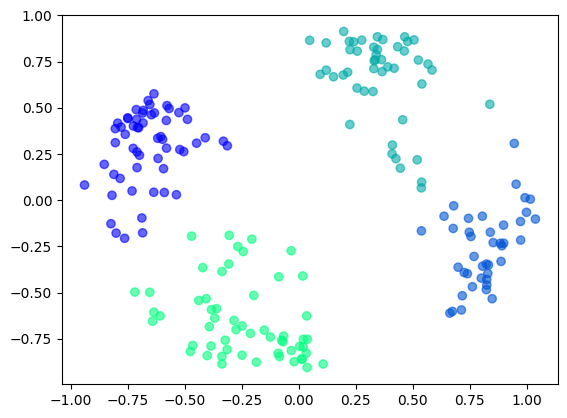

In [26]:
# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = GaussianMixture(n_components = 4).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


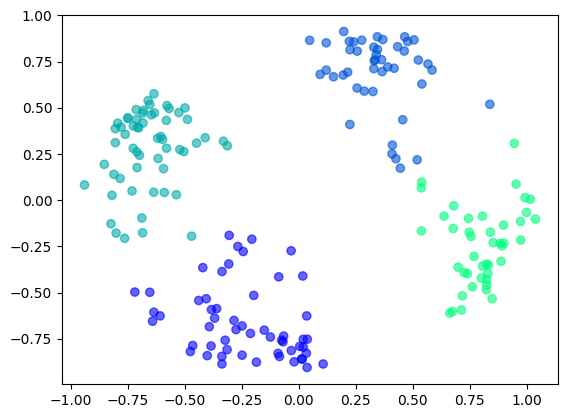

In [27]:
#training k-means model
from sklearn.cluster import KMeans
#data = data.drop(['Gender'],axis=1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_principal)
#kmeans.fit(data)
# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = KMeans(n_clusters = 4).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6)
plt.show()